In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
build=pd.read_csv('EnergyEfficiencyData.csv')

In [5]:
build

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
build.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [7]:
x = build[['Relative Compactness','Surface Area']]

array([[<AxesSubplot:title={'center':'Relative Compactness'}>,
        <AxesSubplot:title={'center':'Surface Area'}>]], dtype=object)

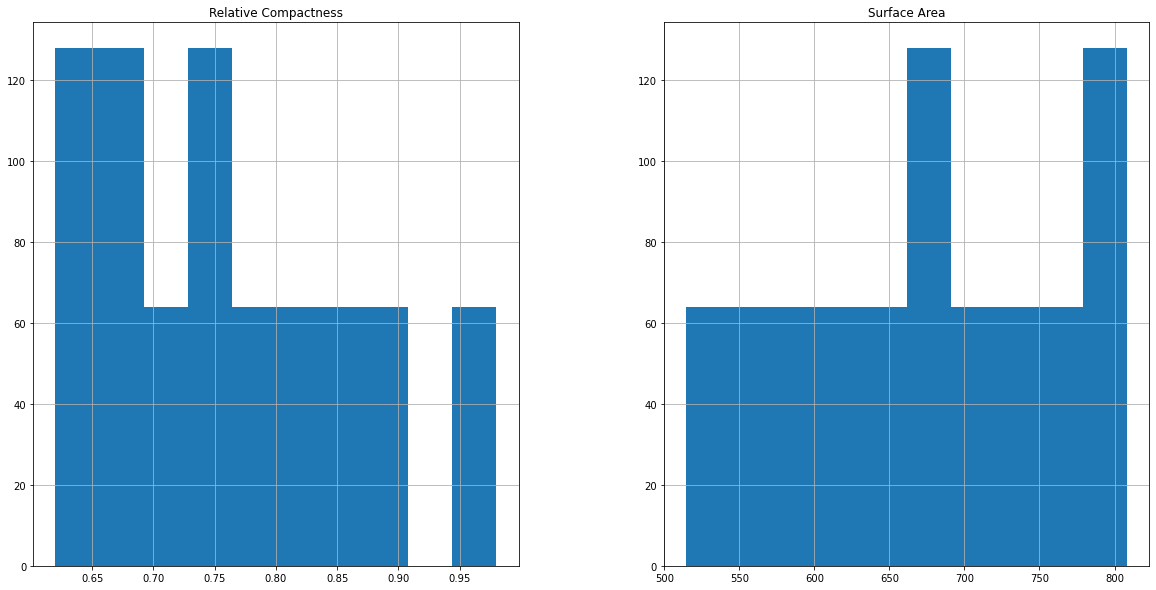

In [9]:
x.hist(figsize=(20,10))

In [10]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(x), columns=['Scaled Relative Compactness','Scaled Surface Area'])

In [11]:
scaled.head()

,Scaled Relative Compactness,Scaled Surface Area
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.777778,0.166667


array([[<AxesSubplot:title={'center':'Scaled Relative Compactness'}>,
        <AxesSubplot:title={'center':'Scaled Surface Area'}>]],
      dtype=object)

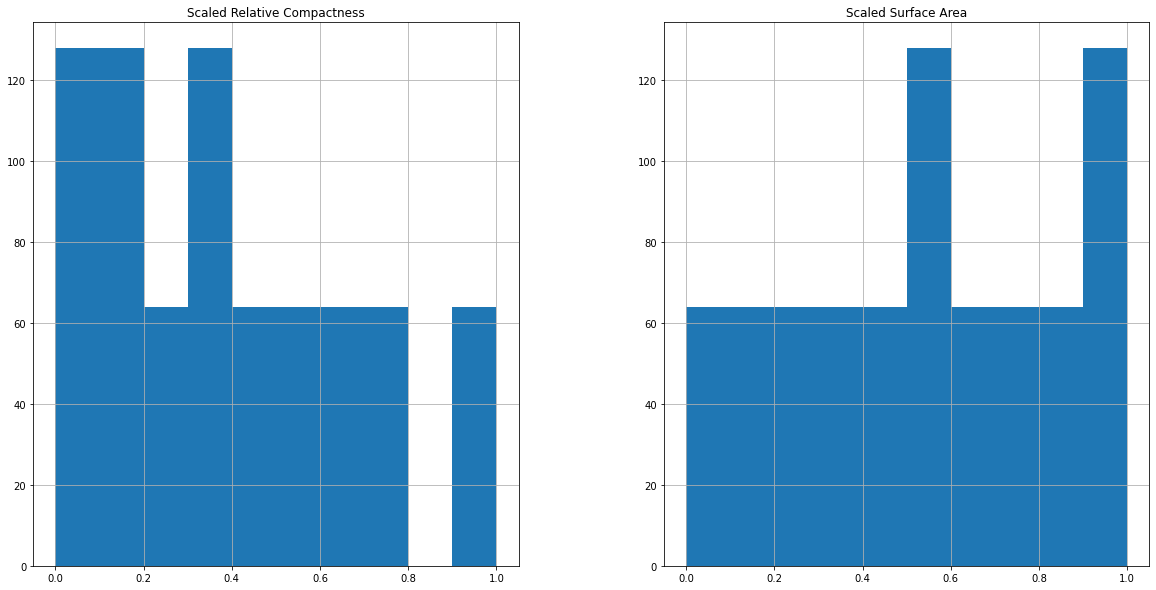

In [12]:
scaled[['Scaled Relative Compactness', 'Scaled Surface Area']].hist(figsize=(20,10))

In [13]:
# Feature Clipping
stocks=pd.read_csv('prices-split-adjusted.csv')

In [14]:
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


array([[<AxesSubplot:title={'center':'open'}>]], dtype=object)

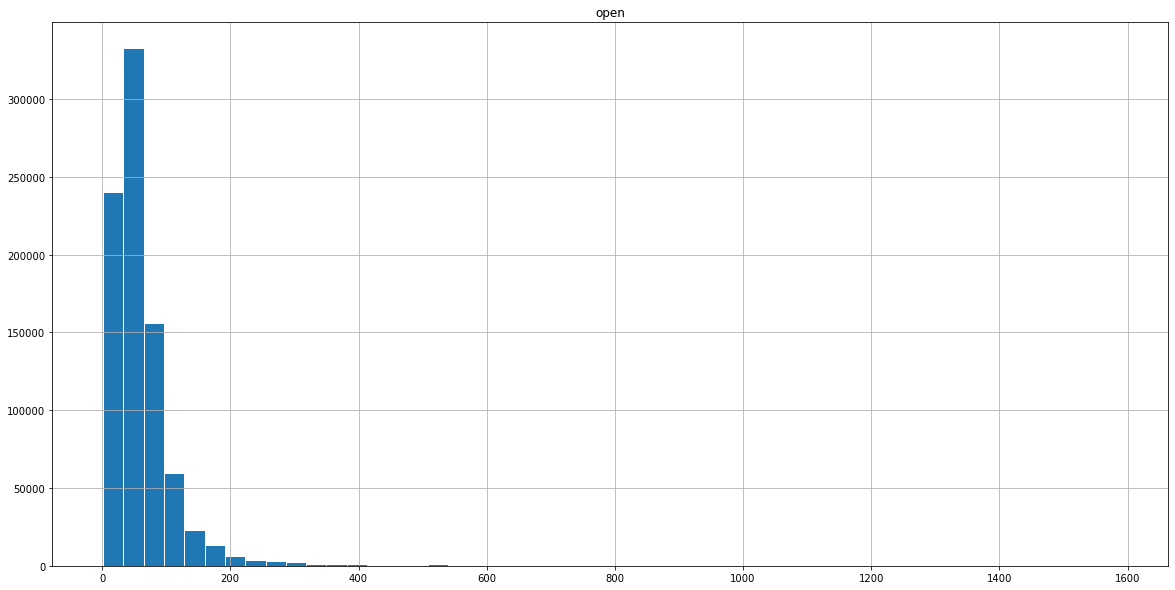

In [16]:
stocks.hist(column='open', bins=50, edgecolor='white',figsize=(20,10))

In [17]:
stocks.loc[stocks['open']>400]=400
#Outliers clipped to 400

array([[<AxesSubplot:title={'center':'open'}>]], dtype=object)

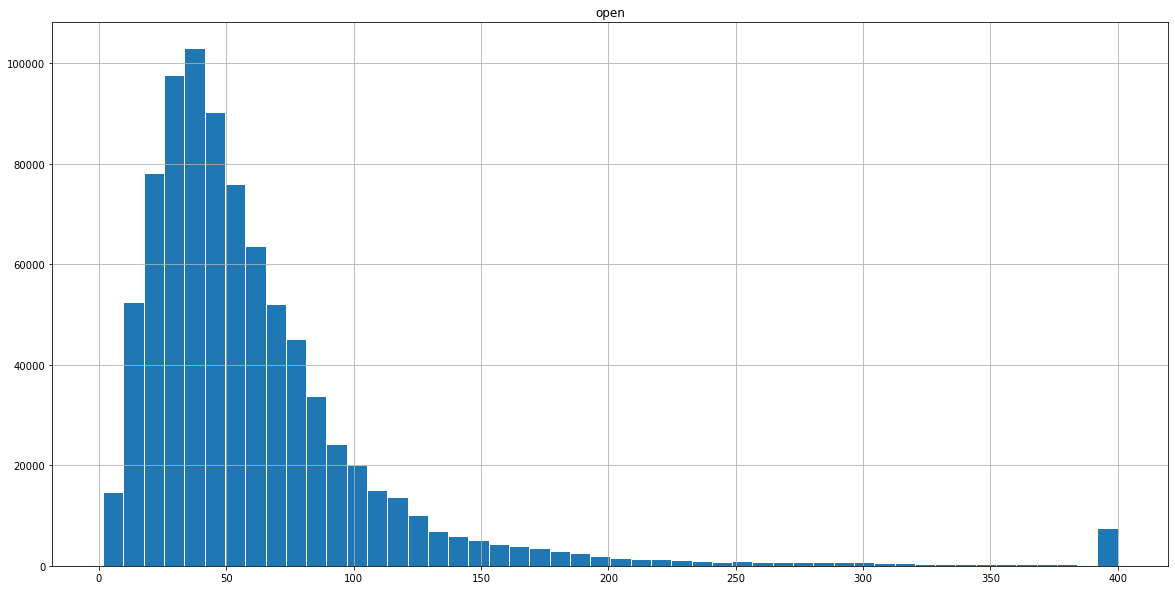

In [19]:
stocks.hist(column='open', bins=50, edgecolor='white',figsize=(20,10))

In [20]:
salary=pd.read_csv("nba.csv")

In [21]:
salary.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

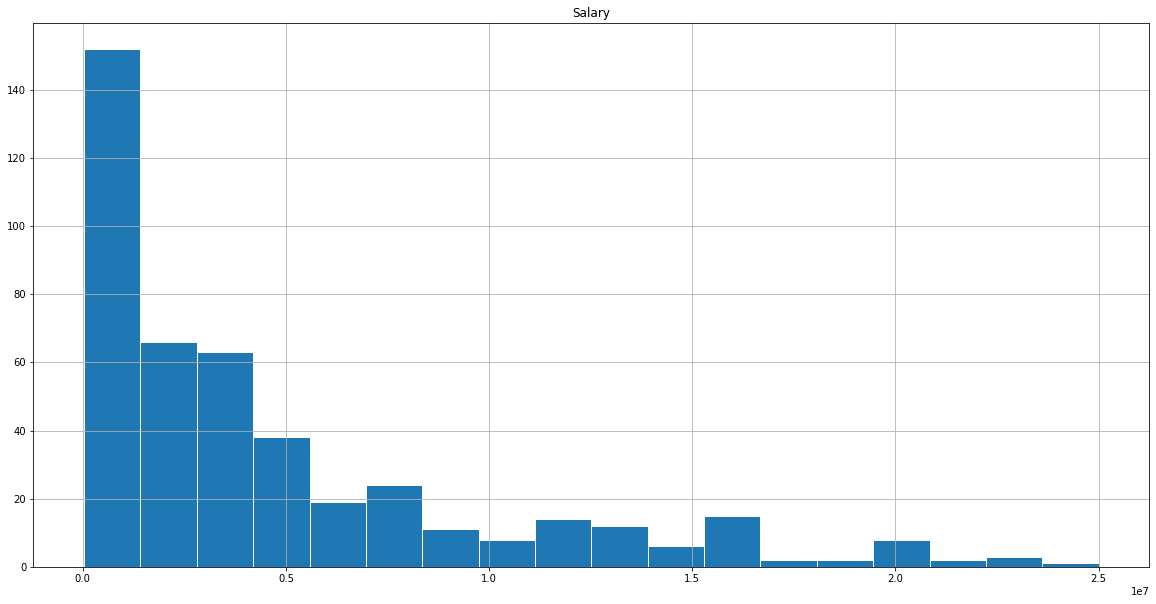

In [22]:
salary.hist(column='Salary',bins='auto', edgecolor='white', figsize=(20,10))

In [23]:
#Log transform/Scaling
salary['Log salary']=np.log10(salary['Salary'])

(array([ 1.,  2.,  4.,  8., 10., 13., 25., 89., 47., 63., 63., 46., 44.,
        31.]),
 array([4.48978979, 4.6975148 , 4.90523982, 5.11296484, 5.32068985,
        5.52841487, 5.73613988, 5.9438649 , 6.15158991, 6.35931493,
        6.56703995, 6.77476496, 6.98248998, 7.19021499, 7.39794001]),
 <BarContainer object of 14 artists>)

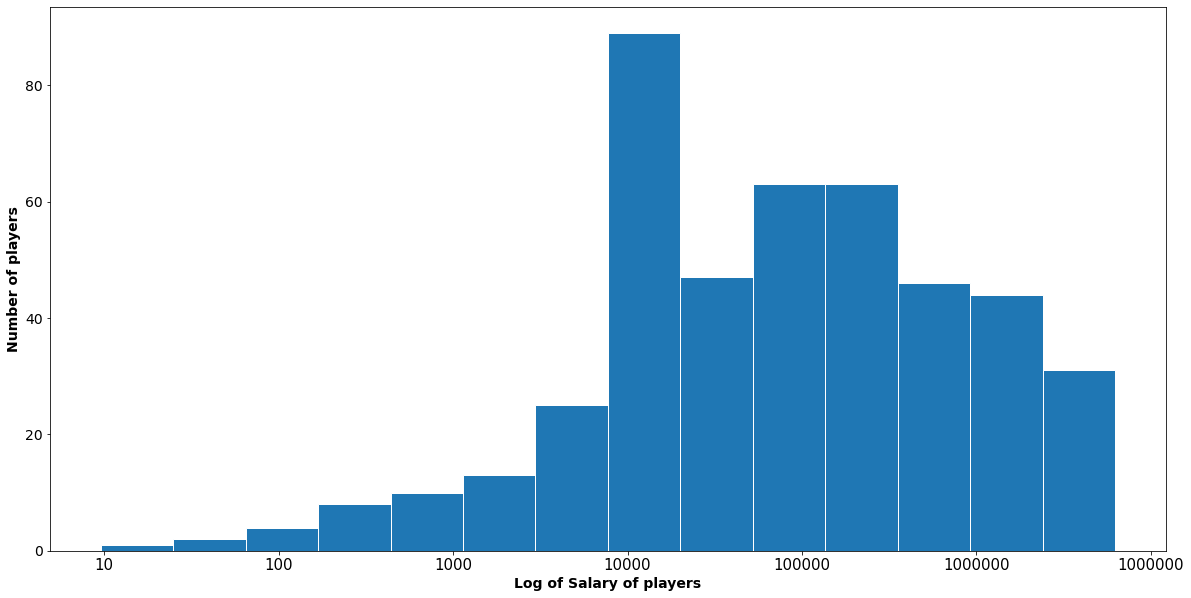

In [24]:
x=salary['Log salary']
plt.figure(figsize=(20,10))
plt.xticks([4.5,5.0,5.5,6.0,6.5,7,7.5], ["10","100","1000","10000","100000","1000000","1000000"], fontsize=15)
plt.yticks(fontsize=14)
plt.xlabel('Log of Salary of players', fontsize=14, fontweight='bold')
plt.ylabel('Number of players', fontsize=14, fontweight='bold')
plt.hist(x,bins='auto', edgecolor='white')